## Convolutional Neural Net

Now, let's use the same MNIST database to classify handwritten digits, but this time, let's use a Convolutional Neural Net (CNN), and see if our performance improves.

## Imports
Let's first import all necessary Python libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils

C:\Users\an345w\AppData\Local\Continuum\anaconda3\envs\ML2018\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Data

Now let's load the mnist data.

In [3]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("old x_train shape is: ", x_train.shape)
print("old y_train shape is: ", y_train.shape)

print("old x_test shape is: ", x_test.shape)
print("old y_test shape is: ", y_test.shape)

#create dict
mapping = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

#save this for later
labels = y_test

old x_train shape is:  (50000, 32, 32, 3)
old y_train shape is:  (50000, 1)
old x_test shape is:  (10000, 32, 32, 3)
old y_test shape is:  (10000, 1)


Again, let's just see what our data looks like:

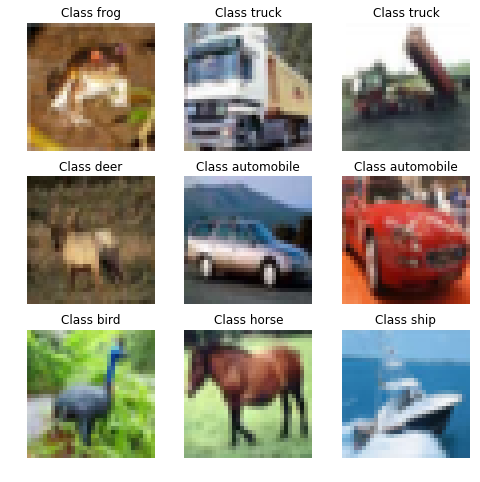

In [4]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(mapping[y_train[i][0]]))

## Format Data
Before we build the model, let's make some minor adjustments.

In [5]:
# Resize features data to contain dimension for channels
x_train = np.reshape(x_train, (50000, 32, 32, 3))
x_test = np.reshape(x_test, (10000, 32, 32, 3))

# Resize labels to be 1D vector
y_train = np.reshape(y_train, (50000, 1))
y_test = np.reshape(y_test, (10000, 1))

print("new x_train shape is: ", x_train.shape)
print("new y_train shape is: ", y_train.shape)

print("new x_test shape is: ", x_test.shape)
print("new y_test shape is: ", y_test.shape)

# Convert labels to categories
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

new x_train shape is:  (50000, 32, 32, 3)
new y_train shape is:  (50000, 1)
new x_test shape is:  (10000, 32, 32, 3)
new y_test shape is:  (10000, 1)


## Build Model
Now let's build the CNN model.

In [6]:
# Create model
model = Sequential()

# Add first convolutional layer - output:(32x32x32)
model.add(Conv2D(input_shape=(32, 32, 3), data_format='channels_last',
                filters=32, kernel_size=(3,3), strides=(1,1),
                padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer (16x16x32)
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',
                       data_format='channels_last'))

# Add second convolutional layer (14x14x64)
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                 padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add third convolutional layer (12x12x128)
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1),
                 padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer (6x6x128)
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid',
                       data_format='channels_last'))

# Flatten (4608,)
model.add(Flatten())

# Add a dense layer (512)
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add one more dense layer (for good measure) (256)
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Finally, add softmax layer (10)
model.add(Dense(10)) #for 10 classes
model.add(Activation('softmax'))

# Compile model with adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model
Now let's actually train the model.

In [7]:
model.fit(x_train, y_train, batch_size=128,
         epochs=100, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 257s 5ms/step - loss: 1.4207 - acc: 0.4898 - val_loss: 1.2684 - val_acc: 0.5396
Epoch 2/100
50000/50000 [==============================] - 254s 5ms/step - loss: 1.0135 - acc: 0.6418 - val_loss: 1.0755 - val_acc: 0.6198
Epoch 3/100
50000/50000 [==============================] - 247s 5ms/step - loss: 0.8426 - acc: 0.7010 - val_loss: 1.0494 - val_acc: 0.6396
Epoch 4/100
50000/50000 [==============================] - 243s 5ms/step - loss: 0.7183 - acc: 0.7467 - val_loss: 0.8357 - val_acc: 0.7063
Epoch 5/100
50000/50000 [==============================] - 242s 5ms/step - loss: 0.6266 - acc: 0.7779 - val_loss: 0.7758 - val_acc: 0.7235
Epoch 6/100
50000/50000 [==============================] - 243s 5ms/step - loss: 0.5435 - acc: 0.8081 - val_loss: 0.7539 - val_acc: 0.7377
Epoch 7/100
50000/50000 [==============================] - 250s 5ms/step - loss: 0.4724 - acc: 0.8326 - val_loss: 0.

50000/50000 [==============================] - 240s 5ms/step - loss: 0.0414 - acc: 0.9860 - val_loss: 1.1334 - val_acc: 0.7680
Epoch 60/100
50000/50000 [==============================] - 240s 5ms/step - loss: 0.0422 - acc: 0.9852 - val_loss: 1.1800 - val_acc: 0.7617
Epoch 61/100
50000/50000 [==============================] - 240s 5ms/step - loss: 0.0398 - acc: 0.9863 - val_loss: 1.1579 - val_acc: 0.7582
Epoch 62/100
50000/50000 [==============================] - 240s 5ms/step - loss: 0.0427 - acc: 0.9856 - val_loss: 1.0629 - val_acc: 0.7783
Epoch 63/100
50000/50000 [==============================] - 243s 5ms/step - loss: 0.0411 - acc: 0.9856 - val_loss: 1.1436 - val_acc: 0.7687
Epoch 64/100
50000/50000 [==============================] - 240s 5ms/step - loss: 0.0371 - acc: 0.9871 - val_loss: 1.1012 - val_acc: 0.7746
Epoch 65/100
50000/50000 [==============================] - 241s 5ms/step - loss: 0.0376 - acc: 0.9869 - val_loss: 1.0634 - val_acc: 0.7781
Epoch 66/100
50000/50000 [=======

Let's see what this model looks like:

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
__________

## Evaluate Model
Let's see how well our model ended up doing.

In [11]:
score = model.evaluate(x_test, y_test)

print("Test score:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 13s 1ms/step
Test score: 1.1339987477779387
Test accuracy: 0.7756


Let's see how it did on the first 9:

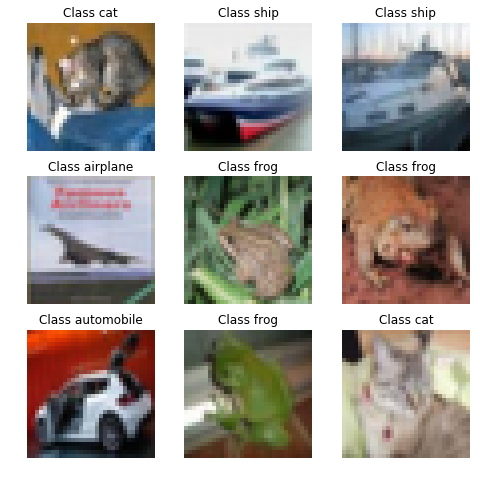

In [13]:
predictions = model.predict_classes(x_test)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(mapping[predictions[i]]))

Lets just take a look at a few examples that went wrong:

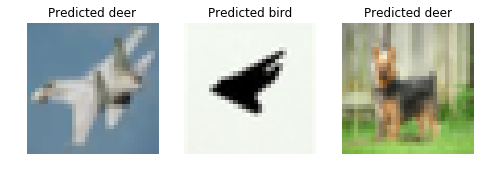

In [10]:
i, count = 0, 1

plt.figure(figsize=(8,8))
while count < 4 and i < 60000:
    if predictions[i] != labels[i]:
        plt.subplot(1,3,count)
        plt.axis('off')
        plt.imshow(x_test[i].reshape(32,32,3), cmap='gray', interpolation='none')
        plt.title("Predicted {}".format(mapping[predictions[i]]))
        count += 1
    i += 1

Even I can barely correctly identify these examples!